In [164]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
from tensorflow.keras import initializers
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure


In [165]:
x_test_scaled = pd.read_csv('260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [166]:
test_set = x_test_scaled.copy()

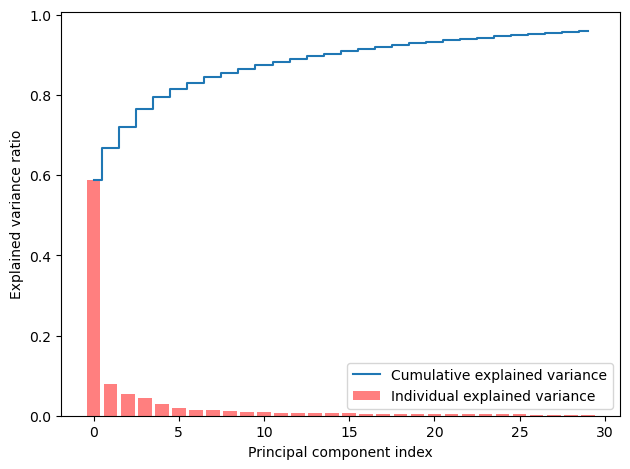

In [167]:
#https://vitalflux.com/pca-explained-variance-concept-python-example/#google_vignette

pca = PCA()
pca = PCA(n_components=.96)
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(test_set)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', color='r',label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [168]:
# https://www.datacamp.com/tutorial/principal-component-analysis-in-python

def encode_pca(dataset):
    comp_cols = np.asarray(np.arange(2), dtype=str)
    pca_x_test = PCA(n_components=.97)
    principalComponents_x_test = pca_x_test.fit_transform(dataset)
    pca_x_test_ds = pd.DataFrame(data = principalComponents_x_test, 
                                       index=dataset.index)
    return pca_x_test_ds, pca_x_test

pca_dataset, pca_x_test = encode_pca(test_set)

In [169]:
pca_dataset

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,-2.947570,0.188482,0.100641,0.381468,-0.867942,0.037972,-0.349832,-0.154516,-0.018607,-0.458834,...,-0.143111,0.197925,0.190537,0.017444,-0.031561,0.409541,-0.108800,-0.203278,0.054710,-0.090018
105_CD_plain,-2.137376,0.994852,0.419276,-0.074156,0.418213,-0.130395,-0.425872,0.519719,0.392787,0.046846,...,0.261511,0.021013,-0.146097,-0.190971,-0.014439,-0.065328,-0.295413,-0.077121,-0.059019,0.237766
2_CD_plain,4.461536,-1.228947,-0.019268,1.794078,-0.259040,0.142568,-1.026315,1.041566,-0.107882,0.037725,...,0.045515,-0.000622,-0.067881,0.085187,0.006213,-0.038396,0.153644,0.106535,-0.006551,0.090574
184_CD_plain,0.003861,0.630354,-0.569237,-0.447470,0.375968,0.162263,-0.129301,-0.453713,0.413206,-0.426879,...,-0.081530,0.062949,-0.016022,0.127285,0.073943,-0.092703,0.017671,0.112133,-0.199466,-0.047823
312_CD_plain,-0.673224,-0.352022,-0.516608,-0.642397,0.242147,0.083958,0.126032,-0.357213,0.318324,0.437952,...,0.059980,0.136014,-0.158014,0.048132,-0.312824,0.046127,-0.032062,0.158864,0.025271,0.145960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,-0.609080,-0.953039,0.016015,0.142899,0.777012,-0.625771,0.260263,-0.147999,-0.367601,0.098115,...,-0.322125,-0.088662,-0.105338,-0.310786,-0.342882,-0.059237,0.100684,0.056952,0.055620,-0.098411
279_CD_plain,3.537938,-1.060687,1.638088,-0.328551,-0.980174,-0.197260,0.488113,-0.345031,-0.174888,-0.113366,...,-0.246924,0.230044,-0.076436,0.291526,0.148813,-0.028112,0.103575,-0.130294,-0.223467,0.124365
179_CD_plain,-1.291015,-0.577115,-0.766027,-0.035352,0.158982,-0.147463,0.116490,-0.001241,0.116490,0.297870,...,-0.054256,-0.142465,0.140946,0.088003,0.206953,0.018994,-0.135878,0.175940,0.142826,0.104346


In [170]:
pca_dataset.to_csv("pca_dataset.csv")

In [171]:
print('Explained variation per principal component: {}'.format(pca_x_test.explained_variance_ratio_))
print("Total variance explained:",np.sum(pca_x_test.explained_variance_ratio_))

Explained variation per principal component: [0.58789216 0.07864964 0.05321548 0.04513818 0.03019029 0.01978823
 0.01549283 0.01338982 0.01120262 0.01049712 0.00967305 0.00775334
 0.00710395 0.00696553 0.0058972  0.00578172 0.0054264  0.00521537
 0.00479695 0.00458293 0.00409328 0.00361395 0.00355702 0.00337007
 0.00316917 0.00307437 0.00301912 0.00259887 0.00250751 0.00239117
 0.00228131 0.00202056 0.00190133 0.00183685 0.00176719 0.001736  ]
Total variance explained: 0.9715905796324635


In [172]:
# pc1_var, pc2_var = np.round(pca_x_test.explained_variance_ratio_ * 100, 1)
# pc1_var

## True labels

In [173]:
patient_ids = np.array(pca_dataset.index)
patient_ids

array(['253_CD_plain', '105_CD_plain', '2_CD_plain', '184_CD_plain',
       '312_CD_plain', '271_CD_plain', '62_CD_deep_ulcer',
       '167_CD_deep_ulcer', '196_CD_deep_ulcer', '34_control',
       '23_CD_deep_ulcer', '58_CD_plain', '197_CD_plain',
       '93_CD_deep_ulcer', '229_CD_deep_ulcer', '293_CD_plain',
       '192_CD_plain', '52_CD_plain', '46_CD_deep_ulcer', '268_CD_plain',
       '176_CD_deep_ulcer', '228_CD_plain', '215_CD_plain',
       '307_CD_plain', '49_CD_deep_ulcer', '183_CD_deep_ulcer',
       '191_CD_plain', '270_CD_plain', '41_control', '78_control',
       '50_CD_deep_ulcer', '236_CD_deep_ulcer', '206_CD_plain',
       '19_control', '211_CD_plain', '47_CD_plain', '262_CD_plain',
       '82_control', '161_CD_plain', '137_CD_plain', '180_control',
       '260_CD_deep_ulcer', '134_CD_plain', '289_CD_plain',
       '314_CD_plain', '177_CD_deep_ulcer', '212_CD_deep_ulcer',
       '118_control', '112_CD_plain', '132_CD_plain', '40_CD_plain',
       '230_CD_deep_ulcer', 

In [174]:
def classify(x):
    if "_control" in x: # control
        return 0
    elif "CD_plain" in x: # Crohn's Disease no deep ulcer
#         print(x)
        return 1
    elif "CD_deep_ulcer" in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

disease_labels = vec(patient_ids)
disease_labels

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2])

In [175]:
disease_labels_ext = np.concatenate([disease_labels, [-1]*3])
disease_labels_ext

array([ 1,  1,  1,  1,  1,  1,  2,  2,  2,  0,  2,  1,  1,  2,  2,  1,  1,
        1,  2,  1,  2,  1,  1,  1,  2,  2,  1,  1,  0,  0,  2,  2,  1,  0,
        1,  1,  1,  0,  1,  1,  0,  2,  1,  1,  1,  2,  2,  0,  1,  1,  1,
        2,  1,  0,  2,  0,  2,  0,  1,  2,  1,  2,  0,  1,  2,  1,  0,  1,
        1,  1,  2,  1,  0,  1,  1,  1,  2,  2, -1, -1, -1])

## KMeans clustering

In [176]:
from sklearn.cluster import KMeans

kmeans = KMeans(3, random_state=0)
k_labels = kmeans.fit(pca_dataset).predict(pca_dataset)

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [177]:
for i in range(1, 4):
    k_labels = np.concatenate([k_labels, [-i]])

In [178]:
k_labels

array([ 2,  2,  1,  0,  0,  2,  1,  1,  1,  2,  1,  0,  2,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  2,  0,  0,  2,  2,  0,  2,  2,  0,  1,  0,  2,
        2,  0,  1,  2,  0,  1,  2,  0,  0,  2,  2,  0,  2,  2,  0,  0,  0,
        1,  0,  2,  1,  2,  2,  2,  0,  1,  0,  0,  2,  1,  1,  1,  2,  0,
        0,  2,  0,  2,  2,  0,  1,  2,  0,  0, -1, -2, -3])

In [179]:
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [180]:
no_IBD = disease_labels_ext == 0
CD_no_ulcer = disease_labels_ext == 1
CD_deep_ulcer = disease_labels_ext == 2
UC = disease_labels_ext == 3

In [181]:
no_IBD.shape

(81,)

In [182]:
kmeans.cluster_centers_.shape

(3, 36)

In [183]:
cent_df = pd.DataFrame(kmeans.cluster_centers_)
cent_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.420992,0.339922,-0.099839,-0.298453,0.110199,-0.151632,0.074320,0.040224,0.041398,0.001477,...,-0.019323,0.002929,-0.022412,0.030378,-0.019853,0.010442,0.030627,0.002802,-0.003700,-0.004647
1,2.990355,-0.254216,0.152856,0.169521,-0.091463,0.159495,-0.054748,-0.009654,-0.088564,-0.010890,...,0.002181,-0.011384,0.029466,-0.028260,0.016292,-0.010785,-0.031320,-0.006458,0.005694,0.001283
2,-2.495267,-0.203838,0.006812,0.215398,-0.059941,0.059650,-0.045132,-0.037983,0.014264,0.005754,...,0.019913,0.004483,0.004818,-0.014457,0.010925,-0.004242,-0.012656,0.001280,0.000233,0.004274


In [184]:

km_dataset = pd.concat([pca_dataset, cent_df])
km_dataset
# kmeans.cluster_centers_

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
253_CD_plain,-2.947570,0.188482,0.100641,0.381468,-0.867942,0.037972,-0.349832,-0.154516,-0.018607,-0.458834,...,-0.143111,0.197925,0.190537,0.017444,-0.031561,0.409541,-0.108800,-0.203278,0.054710,-0.090018
105_CD_plain,-2.137376,0.994852,0.419276,-0.074156,0.418213,-0.130395,-0.425872,0.519719,0.392787,0.046846,...,0.261511,0.021013,-0.146097,-0.190971,-0.014439,-0.065328,-0.295413,-0.077121,-0.059019,0.237766
2_CD_plain,4.461536,-1.228947,-0.019268,1.794078,-0.259040,0.142568,-1.026315,1.041566,-0.107882,0.037725,...,0.045515,-0.000622,-0.067881,0.085187,0.006213,-0.038396,0.153644,0.106535,-0.006551,0.090574
184_CD_plain,0.003861,0.630354,-0.569237,-0.447470,0.375968,0.162263,-0.129301,-0.453713,0.413206,-0.426879,...,-0.081530,0.062949,-0.016022,0.127285,0.073943,-0.092703,0.017671,0.112133,-0.199466,-0.047823
312_CD_plain,-0.673224,-0.352022,-0.516608,-0.642397,0.242147,0.083958,0.126032,-0.357213,0.318324,0.437952,...,0.059980,0.136014,-0.158014,0.048132,-0.312824,0.046127,-0.032062,0.158864,0.025271,0.145960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70_CD_deep_ulcer,1.207641,-0.026280,0.159282,-0.333746,0.895928,0.184538,-0.046973,-0.216240,0.073500,-0.198031,...,-0.150857,0.214747,0.067794,-0.039808,-0.151970,-0.158618,-0.229016,-0.054344,-0.006257,0.001056
256_CD_deep_ulcer,0.180783,0.197810,-0.407120,-0.674152,-0.160139,-0.264698,-0.184897,0.218234,0.207985,0.317530,...,0.099152,-0.029178,0.456928,0.318901,0.261695,-0.077991,0.106715,0.074368,0.143048,0.281053
0,0.420992,0.339922,-0.099839,-0.298453,0.110199,-0.151632,0.074320,0.040224,0.041398,0.001477,...,-0.019323,0.002929,-0.022412,0.030378,-0.019853,0.010442,0.030627,0.002802,-0.003700,-0.004647
1,2.990355,-0.254216,0.152856,0.169521,-0.091463,0.159495,-0.054748,-0.009654,-0.088564,-0.010890,...,0.002181,-0.011384,0.029466,-0.028260,0.016292,-0.010785,-0.031320,-0.006458,0.005694,0.001283


In [185]:
fals_arr = [False, False, False]
np.concatenate([(k_labels == 0), fals_arr])

array([False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False, False,  True, False,  True, False, False,  True,
       False, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False])

In [186]:
# def get_full_masks(labels):
#     fals_arr = [False, False, False]
#     masks = [np.concatenate([(labels == i), fals_arr]) for i in range(4)]
#     return masks

centres: [[-1.0579797  1.0816718]
 [-5.3019147  3.6898026]
 [ 4.505941  -3.375409 ]]
radii: [4.751847048064043, 2.818290795831973, 2.5625328117126838]


<Figure size 1200x800 with 0 Axes>

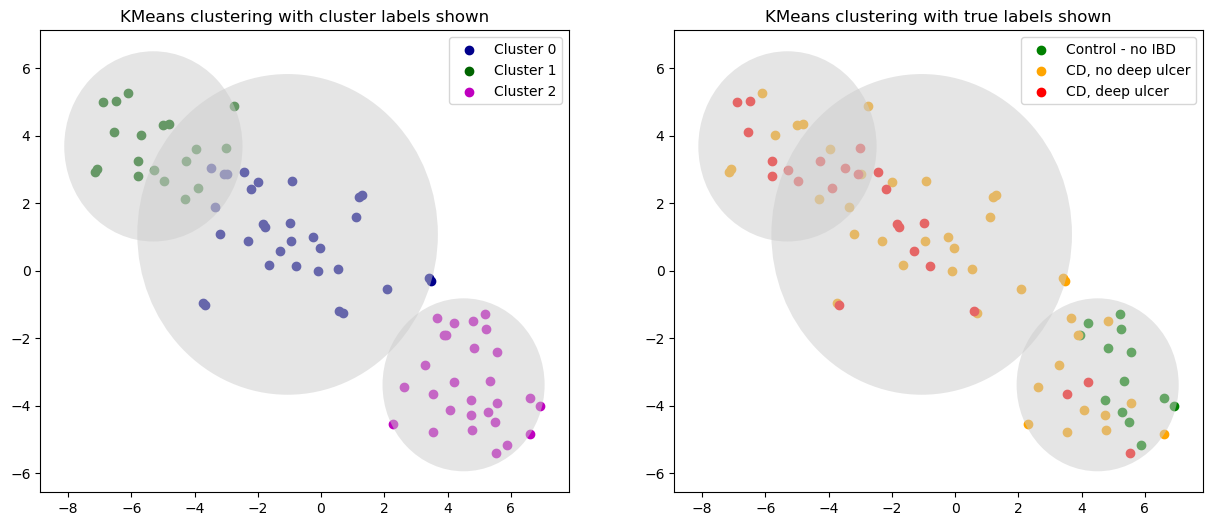

In [187]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from scipy.spatial.distance import cdist

def plot_pca(km_dataset, kmeans, k_labels, selected_patient_idx=None):


    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
    ax = subplots[0]
    ax2 = subplots[1]
    
    tsne = manifold.TSNE(
        n_components=2,
        init="random",
        random_state=0,
        perplexity=24,
        n_iter=750,
        method='exact'
    )
    Y = tsne.fit_transform(km_dataset)
#     Y = pca_dataset.values


    # plot with kmeans labels
    no_IBD = k_labels == 0
    CD_no_ulcer = k_labels == 1
    CD_deep_ulcer = k_labels == 2
#     UC = k_labels == 3
    ax.scatter(Y[no_IBD, 0], Y[no_IBD, 1], c="darkblue", label="Cluster 0")
    ax.scatter(Y[CD_no_ulcer, 0], Y[CD_no_ulcer, 1], c="darkgreen", label="Cluster 1")
    ax.scatter(Y[CD_deep_ulcer, 0], Y[CD_deep_ulcer, 1], c="m", label="Cluster 2")
    ax.set_title("KMeans clustering with cluster labels shown")
    
    # plot with true labels
    no_IBD = disease_labels_ext == 0
    CD_no_ulcer = disease_labels_ext == 1
    CD_deep_ulcer = disease_labels_ext == 2
#     UC = disease_labels_ext == 3
    ax2.scatter(Y[no_IBD, 0], Y[no_IBD, 1], c="g", label="Control - no IBD")
    ax2.scatter(Y[CD_no_ulcer, 0], Y[CD_no_ulcer, 1], c="orange", label="CD, no deep ulcer")
    ax2.scatter(Y[CD_deep_ulcer, 0], Y[CD_deep_ulcer, 1], c="r", label="CD, deep ulcer")
    ax2.set_title("KMeans clustering with true labels shown")
    

    
    # plot the representation of the KMeans model (both)
    centers = Y[-3:]
    radii = [cdist(Y[k_labels == i], [center]).max()
             for i, center in enumerate(centers)]
    print("centres:", centers)
    print("radii:", radii)
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        ax2.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

    if selected_patient_idx is not None:
        ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=400, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")

    ax.legend()
    ax2.legend()
#     ax.set_xlabel("PC1 ("+str(pc1_var)+"%)")
#     ax.set_ylabel("PC2 ("+str(pc2_var)+"%)")

    ax.axis("tight")
    plt.show()


figure(figsize=(15, 10), dpi=80)
plot_pca(km_dataset, kmeans, k_labels)

## Gaussian Mixture Models

In [240]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse
from sklearn import mixture

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, true_labels):
    gmm_labels = gmm.fit(X).predict(X)
    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
#     ax = ax or plt.gca()
    labels = [gmm_labels, true_labels]
    
    for i, label_set in enumerate(labels):
        ax = subplots[i]
        left = -8
        right = 8
        ax.set_xlim(left, right)
        ax.set_ylim(left, right)
        
        if i==0:
            cluster_names = ["Cluster " + str(i) for i in range(3)]
            colours = ["green", "darkblue", "magenta"]
            ax.set_title("GMM soft clustering with cluster labels shown")
        else:
            cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
            colours = ["green", "orange", "red"]
            ax.set_title("GMM soft clustering with true labels shown")
            
        for i in range(3):
            ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 
#         ax.scatter(X[label_set==0, 0], X[label_set==0, 1], c=colours[0], label=cluster_names[0], s=40, cmap='viridis', zorder=2)
#         ax.scatter(X[label_set==1, 0], X[label_set==1, 1], c=colours[1], label=cluster_names[1], s=40, cmap='viridis', zorder=2)
#         ax.scatter(X[label_set==2, 0], X[label_set==2, 1], c=colours[2], label=cluster_names[2], s=40, cmap='viridis', zorder=2)

        ax.axis('equal')
        

        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
        ax.legend()

        
# def get_tsne_ds_true_labels():
#     tsne = manifold.TSNE(
#         n_components=2,
#         init="random",
#         random_state=0,
#         perplexity=24,
#         n_iter=750,
#         method='exact'
#     )
#     X = tsne.fit_transform(test_set)

In [230]:
disease_labels==0

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False])

In [242]:
gmm = mixture.GaussianMixture(n_components=3,covariance_type='full', random_state=42)
# gmm = GMM(n_components=4, random_state=42)
# g_labels = 
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(pca_dataset)

In [201]:
# gmm.means_
# gmm.covariances_
# gmm.weights_

### Fit GMM in latent space

### Fit and visualise in 2D

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shard\AppData\Local\Temp\ipykernel_41936\2534224637.py:45: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_41936\2534224637.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


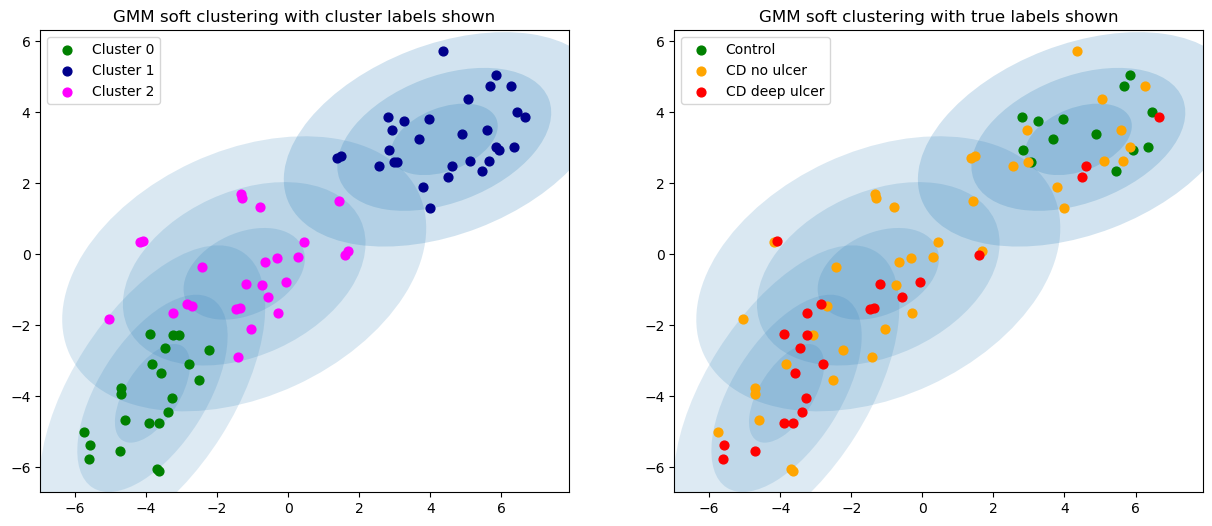

In [243]:
plot_gmm(gmm, X, disease_labels)

## Gene expression distributions of test set (post scaling)

In [68]:
# tsne_dataset

In [69]:
hundred_control = x_test_scaled.loc[x_test_scaled.index.str.endswith('_control')]
hundred_CD_plain = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
hundred_CD_deep_ulcer = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
datasets = [hundred_control, hundred_CD_plain, hundred_CD_deep_ulcer]
labels = ["Control", "Crohn's Disease", "Crohn's Disease Deep Ulcer"]
colours = ["green", "orange", "red"]

In [70]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import math

# for gene_symbol in hundred_control.columns:
#     for i in range(len(datasets)):
#         ds = datasets[i]
#         label = labels[i]
#         colour = colours[i]
#         vals = ds[gene_symbol].values
#         gene_stats = ds.describe()
#         g_mean = gene_stats.loc["mean", gene_symbol]
#         g_std = gene_stats.loc["std", gene_symbol]
#         g_min = gene_stats.loc["min", gene_symbol]
#         g_max = gene_stats.loc["max", gene_symbol]

#         mu = g_mean
#         variance = g_std**2
#         sigma = math.sqrt(variance)
#         x = np.linspace(g_min, g_max, 100)
#         plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label, c=colour)

#         if i<4:
#             plt.hist(vals, bins=25, density=True, alpha=0.6, color=colour)
#     plt.title(gene_symbol+" Distributions")
#     plt.xlabel('Gene expression (FPKM)')
#     plt.ylabel('Probability density')
#     plt.legend()
#     plt.show()

# Class contrastive explainability

## CD Deep Ulcer patient

In [141]:
test_set = x_test_scaled.copy()
test_set

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [142]:
# pid = '212_CD_deep_ulcer'
def get_patient(symptom, frac=2):
    poss_patients = test_set.loc[test_set.index.str.endswith(symptom)]
    print(len(poss_patients),"possible")
    selected_patient = poss_patients.iloc[[len(poss_patients)//frac]]
    pid = selected_patient.index[0]
    return selected_patient, pid

selected_patient, pid = get_patient('CD_deep_ulcer')
selected_patient

24 possible


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [143]:
pid

'260_CD_deep_ulcer'

In [144]:
ind = km_dataset.index
selected_patient_idx = ind.get_loc(pid)


centres: [[-1.0579797  1.0816718]
 [-5.3019147  3.6898026]
 [ 4.505941  -3.375409 ]]
radii: [4.751847048064043, 2.818290795831973, 2.5625328117126838]


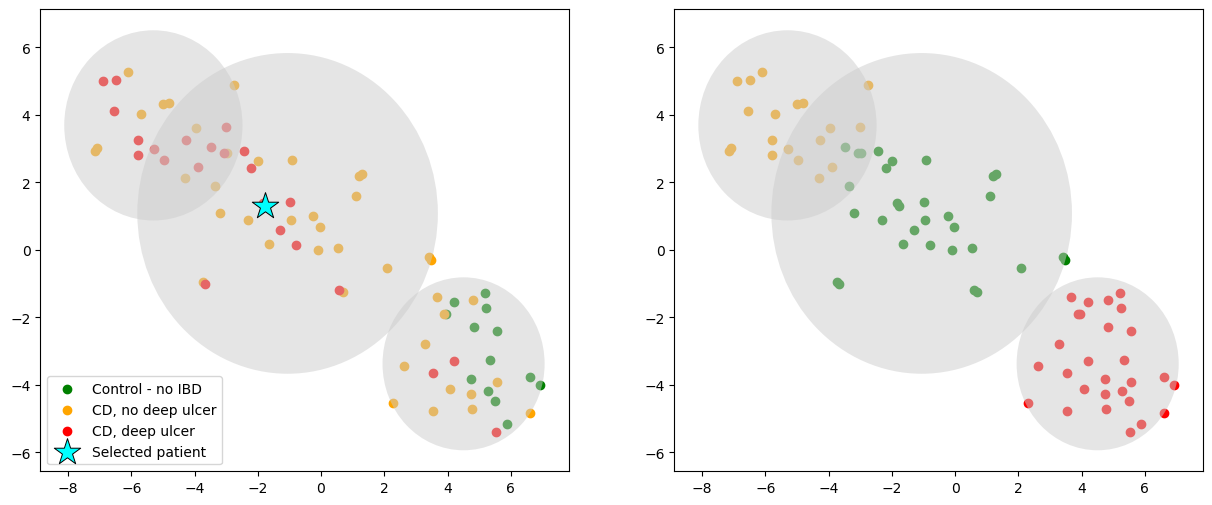

In [145]:


plot_pca(km_dataset, kmeans, k_labels, selected_patient_idx)

In [ ]:
### MODIFIED UP TO HERE

### Modify gene expressions for the selected patient - 60 genes

In [76]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

# selected_patient, pid = get_patient('CD_deep_ulcer')
# selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [77]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [78]:
def modify_expression(pid, most_diff_genes, dataset):
    print("dataset size (should be test):",dataset.shape)
    controls = dataset.loc[dataset.index.str.endswith('_control')]
#     plains = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
#     ulcers = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
    
    for gene_symbol in most_diff_genes:
        new_val = controls.describe().loc["mean", gene_symbol]
        dataset.loc[dataset.index.str.startswith(pid), gene_symbol] = new_val
    return dataset



In [79]:
test_set.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'TAF15', 'ZFYVE20', 'LOC100420253', 'LY6G5B', 'C5orf58', 'RSL24D1P1',
       'MIEN1', 'PCBP1_AS1', 'LOC100133165', 'DNAJB8'],
      dtype='object', length=219)

In [80]:
test_set = modify_expression(pid, most_diff_genes_60, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.837271,0.625309,0.800854,0.834515,0.740914,0.578012,0.638968,0.173455,0.313654,0.836045,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


## Re-encoding the dataset

In [81]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.925279,0.182552
105_CD_plain,-2.115507,0.991462
2_CD_plain,4.494185,-1.191173
184_CD_plain,0.020712,0.624268
312_CD_plain,-0.653210,-0.360928
...,...,...
107_CD_plain,-0.582347,-0.948899
279_CD_plain,3.567900,-1.041802
179_CD_plain,-1.269183,-0.587896


## Replot tSNE

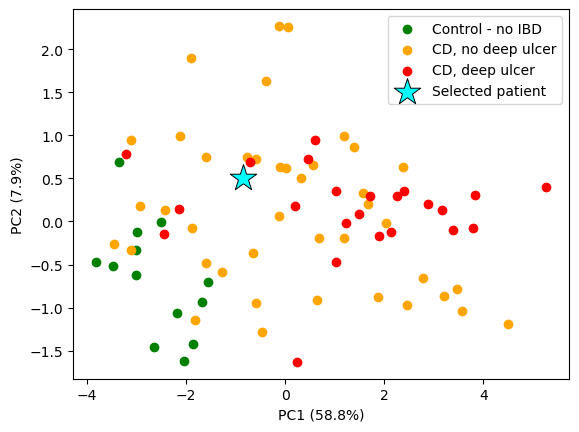

In [82]:


plot_pca(pca_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 120 genes

In [83]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


In [84]:

# selected_patient = tsne_dataset.loc[tsne_dataset.index.str.startswith(pid)]
# selected_patient

In [85]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['FDCSP', 'FNDC4', 'JKAMP', 'RUFY4']

In [86]:
test_set = modify_expression(pid, most_diff_genes, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
260_CD_deep_ulcer,0.588189,0.625309,0.750597,0.746795,0.678619,0.578012,0.191236,0.321755,0.595506,0.569387,...,0.327476,0.256429,0.0,0.787863,0.559487,0.0,0.363882,0.283622,0.0,0.0


## Re-encoding the dataset

In [87]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.947620,0.186595
105_CD_plain,-2.137330,0.995053
2_CD_plain,4.462112,-1.224724
184_CD_plain,0.004159,0.630168
312_CD_plain,-0.672898,-0.353146
...,...,...
107_CD_plain,-0.608218,-0.949131
279_CD_plain,3.538564,-1.057623
179_CD_plain,-1.290638,-0.577750


## Replot tSNE

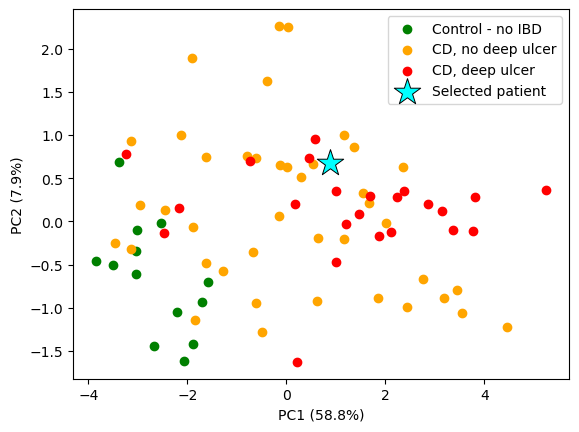

In [88]:


plot_pca(pca_dataset, selected_patient_idx)

Patient moves into the control cluster

## CD No Deep Ulcer patient

In [89]:
test_set = x_test_scaled.copy()
test_set

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [90]:


selected_patient, pid = get_patient('CD_plain', 6)
selected_patient

41 possible


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [91]:
pid

'58_CD_plain'

In [92]:
ind = pca_dataset.index
selected_patient_idx = ind.get_loc(pid)


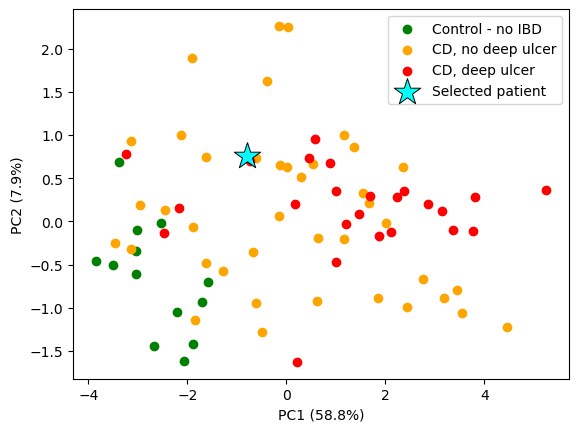

In [93]:


plot_pca(pca_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 60 genes

In [94]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

# selected_patient, pid = get_patient('CD_deep_ulcer')
# selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [95]:
with open("most_diff_genes_60", "rb") as fp:   # Unpickling
    most_diff_genes_60 = pickle.load(fp)

In [96]:
def modify_expression(pid, most_diff_genes, dataset):
    print("dataset size (should be test):",dataset.shape)
    controls = dataset.loc[dataset.index.str.endswith('_control')]
#     plains = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_plain')]
#     ulcers = x_test_scaled.loc[x_test_scaled.index.str.endswith('_CD_deep_ulcer')]
    
    for gene_symbol in most_diff_genes:
        new_val = controls.describe().loc["mean", gene_symbol]
        dataset.loc[dataset.index.str.startswith(pid), gene_symbol] = new_val
    return dataset



In [97]:
test_set.columns

Index(['AADAC', 'APOA1', 'APOA4', 'APOB', 'APOC3', 'AQP9', 'C6', 'CEACAM7',
       'CHI3L1', 'ABCC2',
       ...
       'TAF15', 'ZFYVE20', 'LOC100420253', 'LY6G5B', 'C5orf58', 'RSL24D1P1',
       'MIEN1', 'PCBP1_AS1', 'LOC100133165', 'DNAJB8'],
      dtype='object', length=219)

In [98]:
test_set = modify_expression(pid, most_diff_genes_60, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.837271,0.67885,0.800854,0.834515,0.740914,0.498697,0.638968,0.173455,0.313654,0.836045,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


## Re-encoding the dataset

In [99]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.938074,0.186826
105_CD_plain,-2.126290,1.013352
2_CD_plain,4.470625,-1.217936
184_CD_plain,0.013552,0.639135
312_CD_plain,-0.663766,-0.349455
...,...,...
107_CD_plain,-0.599124,-0.944227
279_CD_plain,3.545774,-1.068370
179_CD_plain,-1.281190,-0.573442


## Replot tSNE

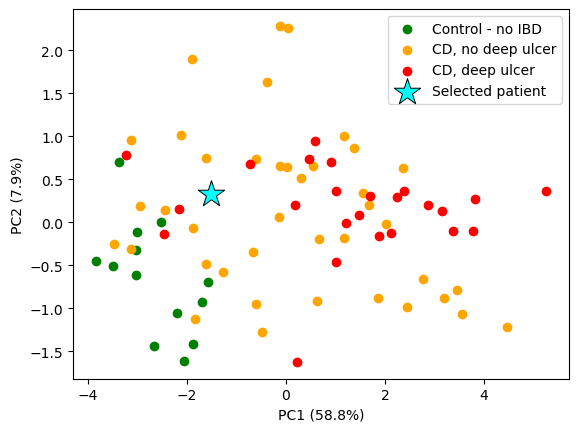

In [100]:


plot_pca(pca_dataset, selected_patient_idx)

### Modify gene expressions for the selected patient - 120 genes

In [101]:
test_set = x_test_scaled.copy()

selected_patient = test_set.loc[test_set.index.str.startswith(pid)]
selected_patient

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


In [102]:

# selected_patient = tsne_dataset.loc[tsne_dataset.index.str.startswith(pid)]
# selected_patient

In [103]:
with open("most_diff_genes_115", "rb") as fp:   # Unpickling
    most_diff_genes = pickle.load(fp)

most_diff_genes

['FDCSP', 'FNDC4', 'JKAMP', 'RUFY4']

In [104]:
test_set = modify_expression(pid, most_diff_genes, test_set)
test_set.loc[test_set.index.str.startswith(pid)]

dataset size (should be test): (78, 219)


,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
58_CD_plain,0.712765,0.67885,0.86582,0.855696,0.828452,0.498697,0.567772,0.352862,0.317254,0.76505,...,0.211571,0.283032,0.0,0.703328,0.556984,0.0,0.415272,0.225017,0.0,0.0


## Re-encoding the dataset

In [105]:
pca_dataset, pca_x_test = encode_pca(test_set)
pca_dataset

,0,1
Patient_ID,,
253_CD_plain,-2.947198,0.185932
105_CD_plain,-2.137259,0.996342
2_CD_plain,4.461854,-1.230253
184_CD_plain,0.003821,0.632336
312_CD_plain,-0.673183,-0.351477
...,...,...
107_CD_plain,-0.609229,-0.950407
279_CD_plain,3.538105,-1.063885
179_CD_plain,-1.291112,-0.575246


## Replot tSNE

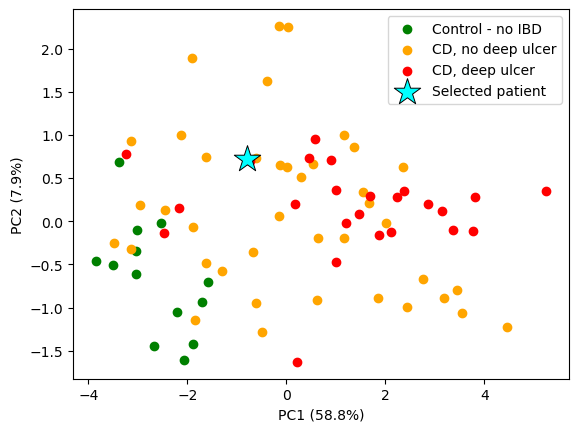

In [106]:


plot_pca(pca_dataset, selected_patient_idx)

Patient moves into the control cluster